In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-python
!pip install matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random


In [ ]:
import os
print(os.listdir("/content"))


['.config', 'maharashtra.jpg', 'sample_data']


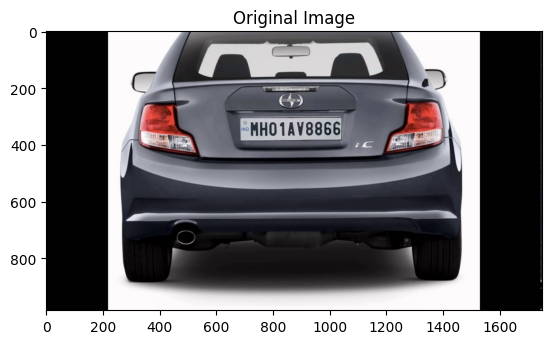

Text(0.5, 1.0, 'Processed Image')

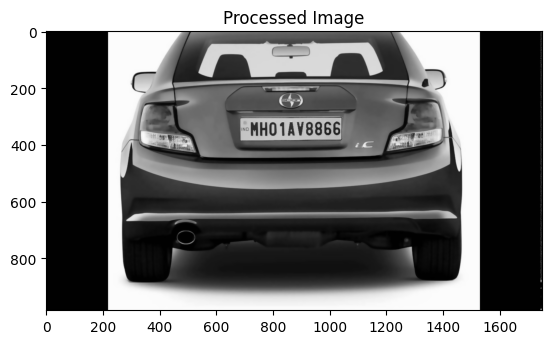

In [ ]:
img = cv2.imread("/content/maharashtra.jpg") #read image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB)) #show processed image
plt.title('Processed Image')

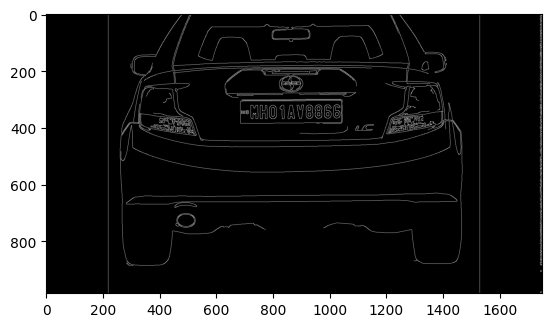

In [ ]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find contours
contours = imutils.grab_contours(keypoints) #Grab contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #Sort contours


In [ ]:
#Loop over our contours to find the best possible approximate contour of 10 contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

print("Location: ", location)


Location:  [[[1042  308]]

 [[1038  383]]

 [[ 686  383]]

 [[ 688  307]]]


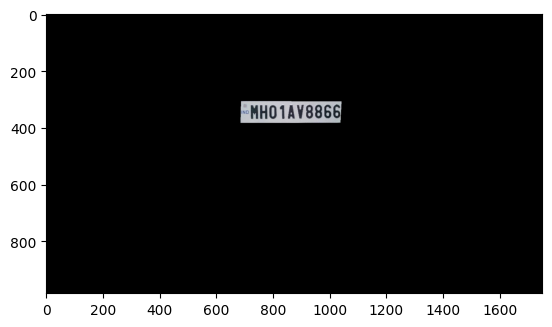

In [ ]:
mask = np.zeros(gray.shape, np.uint8) #create blank image with same dimensions as the original image
new_image = cv2.drawContours(mask, [location], 0,255, -1) #Draw contours on the mask image
new_image = cv2.bitwise_and(img, img, mask=mask) #Take bitwise AND between the original image and mask image

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) #show the final image


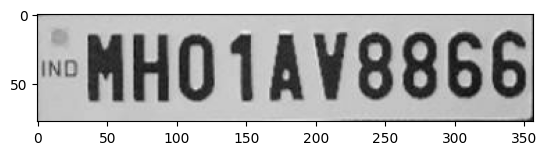

In [ ]:
(x,y) = np.where(mask==255) #Find the co-ordinates of the four corners of the document
(x1, y1) = (np.min(x), np.min(y)) #Find the top left corner
(x2, y2) = (np.max(x), np.max(y)) #Find the bottom right corner
cropped_image = gray[x1:x2+1, y1:y2+1] #Crop the image using the co-ordinates

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)) #show the cropped image


In [ ]:
reader = easyocr.Reader(['en']) #create an easyocr reader object with english as the language
result = reader.readtext(cropped_image) #read text from the cropped image
result


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 29], [33, 29], [33, 49], [0, 49]], 'IND', 0.9653514495442986),
 ([[26, 0], [357, 0], [357, 73], [26, 73]],
  'MHO 1Av8866',
  0.42451202588834186)]

In [ ]:

text = result[0][-2] #Extract the text from the result
if(text=='IND'):
  text=result[1][-2]
print(text)
# font = cv2.FONT_HERSHEY_SIMPLEX #Font style
# res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA) #put the text on the image
# res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) #Draw a rectangle around the text

# plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)) #show the final image with text
# print(text)

MHO 1Av8866


In [ ]:
number_plate=text[0]+text[1]
print(number_plate)

MH


In [ ]:
# Define state mapping
state_mapping = {
    'DL': 'Delhi',
    'MH': 'Maharashtra',
    'KA': 'Karnataka',
    'TN': 'Tamil Nadu',
    'UP': 'Uttar Pradesh',
    'RJ': 'Rajasthan',
    'HR': 'Haryana',
    'PB': 'Punjab',
    'WB': 'West Bengal',
    'MP': 'Madhya Pradesh',
    'GJ': 'Gujarat',
    '6J': 'Gujarat',
    'BR': 'Bihar',
    'AS': 'Assam',
    'CT': 'Chhattisgarh',
    'JH': 'Jharkhand',
    'SK': 'Sikkim',
    'AR': 'Arunachal Pradesh',
    'NL': 'Nagaland',
    'MZ': 'Mizoram',
    'TR': 'Tripura',
    'ML': 'Meghalaya',
    'LA': 'Ladakh',
    'UT': 'Uttarakhand',
    'HP': 'Himachal Pradesh',
    'GO': 'Goa',
    'D': 'Dadra and Nagar Haveli and Daman and Diu',
    'HR': 'Haryana',
    'AP': 'Andhra Pradesh',
    'MP': 'Madhya Pradesh',
    # Add other states and their codes here
}
state = state_mapping.get(number_plate)

print(f'The vehicle belongs to: {state}')

The vehicle belongs to: Maharashtra


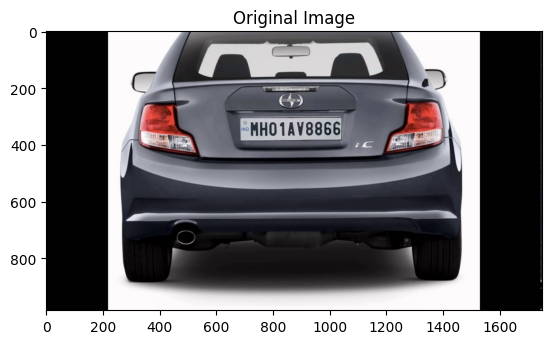

Extracted number plate: MH
The vehicle belongs to: Maharashtra


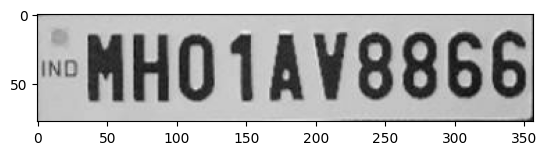

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random

def predict_state_from_license_plate(image_path):
    # Read the image
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()

    # Convert image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

    # Edge detection
    edged = cv2.Canny(bfilter, 30, 200)

    # Find contours
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    # Loop over contours to find the best possible approximate contour
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    if location is None:
        return "No license plate detected"

    mask = np.zeros(gray.shape, np.uint8)  # Create blank image with same dimensions as original image
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)  # Draw contours on the mask image
    new_image = cv2.bitwise_and(img, img, mask=mask)  # Take bitwise AND between original image and mask image

    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))  # Show the final image

    # Find the coordinates of the four corners of the document
    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))  # Top left corner
    (x2, y2) = (np.max(x), np.max(y))  # Bottom right corner
    cropped_image = gray[x1:x2 + 1, y1:y2 + 1]  # Crop the image using the coordinates

    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))  # Show the cropped image

    # Create an easyocr reader object with English as the language
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)  # Read text from the cropped image

    if len(result) == 0:
        return "No text detected on the license plate"

    text = result[0][-2]  # Extract the text from the result
    if text == 'IND':
        text = result[1][-2]

    number_plate = text[0] + text[1]
    print(f"Extracted number plate: {number_plate}")

    # Define state mapping
    state_mapping = {
        'DL': 'Delhi',
        'MH': 'Maharashtra',
        'KA': 'Karnataka',
        'TN': 'Tamil Nadu',
        'UP': 'Uttar Pradesh',
        'RJ': 'Rajasthan',
        'HR': 'Haryana',
        'PB': 'Punjab',
        'WB': 'West Bengal',
        'MP': 'Madhya Pradesh',
        'GJ': 'Gujarat',
        'BR': 'Bihar',
        'AS': 'Assam',
        'CT': 'Chhattisgarh',
        'JH': 'Jharkhand',
        'SK': 'Sikkim',
        'AR': 'Arunachal Pradesh',
        'NL': 'Nagaland',
        'MZ': 'Mizoram',
        'TR': 'Tripura',
        'ML': 'Meghalaya',
        'LA': 'Ladakh',
        'UT': 'Uttarakhand',
        'HP': 'Himachal Pradesh',
        'GO': 'Goa',
        'D': 'Dadra and Nagar Haveli and Daman and Diu',
        'AP': 'Andhra Pradesh',
        # Add other states and their codes here
    }

    state = state_mapping.get(number_plate, "Unknown state")
    return f'The vehicle belongs to: {state}'

# Example usage
image_path = "/content/maharashtra.jpg"
state_prediction = predict_state_from_license_plate(image_path)
print(state_prediction)


In [ ]:
!pip install flask flask-cors opencv-python-headless easyocr imutils matplotlib pyngrok


In [ ]:
from pyngrok import ngrok

# Set your ngrok authtoken
ngrok.set_auth_token("2hHRbHr5ARViN1Bmn5uoMDqemdB_4hAzHDChJdrV1qgnSMxxV")


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import cv2
import numpy as np
import easyocr
import imutils
from pyngrok import ngrok
import os

# Initialize Flask app
app = Flask(__name__)
CORS(app)

# Prediction function
def predict_state_from_license_plate(image):
    img = cv2.imdecode(np.frombuffer(image, np.uint8), cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    if location is None:
        return "No license plate detected"

    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2 + 1, y1:y2 + 1]

    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)

    if len(result) == 0:
        return "No text detected on the license plate"

    text = result[0][-2]
    if text == 'IND':
        text = result[1][-2]

    number_plate = text[0] + text[1]

    state_mapping = {
        'DL': 'Delhi',
        'MH': 'Maharashtra',
        'KA': 'Karnataka',
        'TN': 'Tamil Nadu',
        'UP': 'Uttar Pradesh',
        'RJ': 'Rajasthan',
        'HR': 'Haryana',
        'PB': 'Punjab',
        'WB': 'West Bengal',
        'MP': 'Madhya Pradesh',
        'GJ': 'Gujarat',
        '6J': 'Gujarat',
        'BR': 'Bihar',
        'AS': 'Assam',
        'CT': 'Chhattisgarh',
        'JH': 'Jharkhand',
        'SK': 'Sikkim',
        'AR': 'Arunachal Pradesh',
        'NL': 'Nagaland',
        'MZ': 'Mizoram',
        'TR': 'Tripura',
        'ML': 'Meghalaya',
        'LA': 'Ladakh',
        'UT': 'Uttarakhand',
        'HP': 'Himachal Pradesh',
        'GO': 'Goa',
        'D': 'Dadra and Nagar Haveli and Daman and Diu',
        'AP': 'Andhra Pradesh',
        # Add other states and their codes here
    }

    state = state_mapping.get(number_plate, "Unknown state")
    return f'The vehicle belongs to: {state}'

# Route for file upload
@app.route('/upload', methods=['POST'])
def upload_file():
    if 'file' not in request.files:
        return jsonify({'error': 'No file part'}), 400
    file = request.files['file']
    if file.filename == '':
        return jsonify({'error': 'No selected file'}), 400
    if file:
        image = file.read()
        result = predict_state_from_license_plate(image)
        return jsonify({'result': result})

# Start Flask app with ngrok
if __name__ == '__main__':
    # Kill any previous ngrok sessions
    os.system("pkill -f ngrok")

    # Start ngrok
    public_url = ngrok.connect(5000)
    print(f"Public URL: {public_url}")

    # Run the Flask app
    app.run()


Public URL: NgrokTunnel: "https://b553-35-196-168-64.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 06:04:30] "POST /upload HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 06:19:18] "POST /upload HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 06:21:19] "POST /upload HTTP/1.1" 200 -
